<a href="https://colab.research.google.com/github/RufusRubin/Advanced-Computing-Lab/blob/main/kaggle_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv('/content/drug200.csv')

In [ ]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
x=data[[]]

In [ ]:
from sklearn import preprocessing


In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
asd=['Sex','BP','Cholesterol']

In [ ]:
data[asd]=data[asd].apply(le.fit_transform)

In [ ]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,0,167,0
1,30,1,1,0,89,3
2,30,1,1,0,43,3
3,12,0,2,0,10,4
4,44,0,1,0,133,0
...,...,...,...,...,...,...
195,39,0,1,0,69,3
196,1,1,1,0,75,3
197,35,1,2,0,36,4
198,8,1,2,1,102,4


In [ ]:
x=data[['Age','Sex','BP','Cholesterol','Na_to_K']]

In [ ]:
y=data['Drug']

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda= LDA(n_components=2)

In [ ]:
lda =lda.fit_transform(x,y)

In [ ]:
new_data = pd.DataFrame(lda, columns=['LD1','LD2'])

In [ ]:
new_data

,LD1,LD2
0,-2.090756,-1.483649
1,0.220856,-0.414969
2,1.841757,-0.552186
3,3.271380,1.491154
4,-1.091983,-0.229127
...,...,...
195,1.179986,-0.366270
196,0.811620,-0.144876
197,1.993299,1.116238
198,-0.312853,2.475248


In [ ]:
x_axis= new_data['LD1']

In [ ]:
y_axis = new_data['LD2']

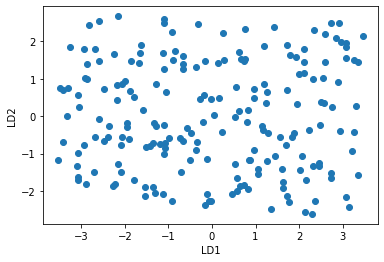

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_axis,y_axis)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model=  KMeans(n_clusters=2, max_iter=100 , random_state=0)

In [ ]:
model=model.fit(new_data)

In [ ]:
centres= model.cluster_centers_

In [ ]:
centres

array([[ 1.77793944, -0.0040929 ],
       [-1.67437015,  0.00385448]])

In [ ]:
labels= model.labels_

In [ ]:
labels

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0], dtype=int32)

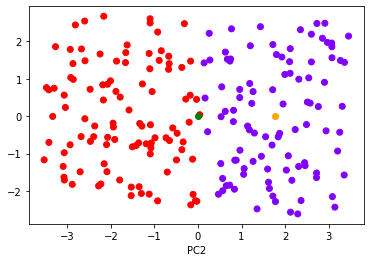

In [ ]:
plt.scatter(x_axis,y_axis, c=labels,cmap= "rainbow")
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.scatter(centres[0][0],centres[0][1],color='orange')
plt.scatter(centres[0][1],centres[1][1],color='green')